<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/Copy_of_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


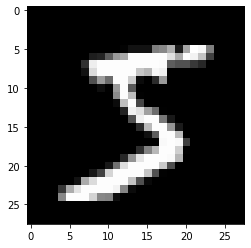

In [4]:
plt.imshow(x_train[0],cmap="gray")
plt.show()

In [0]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [0]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
model_log=model.fit(x=x_train,y=y_train,batch_size=128,epochs=5,verbose=1,validation_split=0.33)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 3s 79us/sample - loss: 0.6911 - acc: 0.8327 - val_loss: 0.2841 - val_acc: 0.9147
Epoch 2/5
40199/40199 [==============================] - 2s 38us/sample - loss: 0.2243 - acc: 0.9348 - val_loss: 0.2013 - val_acc: 0.9400
Epoch 3/5
40199/40199 [==============================] - 2s 38us/sample - loss: 0.1620 - acc: 0.9530 - val_loss: 0.1739 - val_acc: 0.9487
Epoch 4/5
40199/40199 [==============================] - 2s 38us/sample - loss: 0.1271 - acc: 0.9617 - val_loss: 0.1512 - val_acc: 0.9552
Epoch 5/5
40199/40199 [==============================] - 2s 39us/sample - loss: 0.1005 - acc: 0.9698 - val_loss: 0.1423 - val_acc: 0.9556


In [9]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test)
print("\n Test accuracy:",test_acc)
print("\n Test loss:",test_loss)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.1358 - acc: 0.9575

 Test accuracy: 0.9575

 Test loss: 0.1357839799873531


In [10]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9


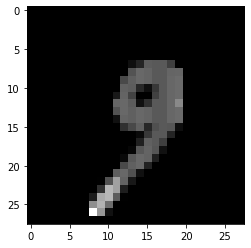

In [11]:
plt.imshow(x_test[1000],cmap="gray")
plt.show()

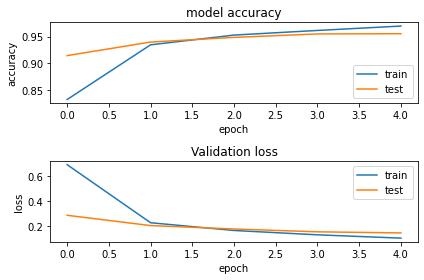

In [12]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()